In [1]:
import json
from chatsky_llm_autoconfig.graph import Graph
from chatsky_llm_autoconfig.dialogue import Dialogue
from chatsky_llm_autoconfig.algorithms.dialogue_generation import RecursiveDialogueSampler
import chatsky_llm_autoconfig.metrics.automatic_metrics as auto_metrics

/home/askatasuna/.cache/pypoetry/virtualenvs/chatsky-llm-autoconfiguration-VcuUrJCU-py3.11/lib/python3.11/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "validate" in "Dialogue" shadows an attribute in parent "BaseModel"
  warnings.warn(


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
with open('/home/askatasuna/Документы/DeepPavlov/chatsky-llm-autoconfig/experiments/2025.01.13_data_check_and_sampler_debugging/data.json', encoding="utf-8") as f:
    data = json.load(f)

In [4]:
sampler = RecursiveDialogueSampler()
for i in data:
    gr = Graph(graph_dict=i['graph'])
    dialogues = sampler.invoke(graph=gr)
    # print(len(dialogues))
    print(auto_metrics.all_utterances_present(gr, dialogues))

True
{"Sorry, I couldn't find this order number. Could you please verify and try again?", "No, that's not my order"}
True
True
{'No, just the original service'}
True
True
True
True
{'Okay, I will call you when it will be ready', 'Takeaway'}


In [5]:
graph_dict = data[1]['graph']
graph_dict.get("nodes")

[{'id': 1,
  'label': 'welcome',
  'is_start': True,
  'utterances': ['Welcome! Food Delivery Service. How can I help you today?']},
 {'id': 2,
  'label': 'request order number',
  'is_start': False,
  'utterances': ['Could you provide your order number?']},
 {'id': 3,
  'label': 'check order exists',
  'is_start': False,
  'utterances': ['Let me check this order number...',
   "Sorry, I couldn't find this order number. Could you please verify and try again?"]},
 {'id': 4,
  'label': 'verify order',
  'is_start': False,
  'utterances': ['I found order #XYZ123 for pizza and pasta. Is this your order?']},
 {'id': 5,
  'label': 'order status',
  'is_start': False,
  'utterances': ['Your order is being prepared and will be delivered to 123 Main St. Estimated delivery time is 45 minutes. Is this address correct?']},
 {'id': 6,
  'label': 'update address',
  'is_start': False,
  'utterances': ['Please provide the correct delivery address.']},
 {'id': 7,
  'label': 'confirm address',
  'is_st

In [6]:
starts = [n for n in graph_dict.get("nodes") if n["is_start"]]
starts

[{'id': 1,
  'label': 'welcome',
  'is_start': True,
  'utterances': ['Welcome! Food Delivery Service. How can I help you today?']}]

In [7]:
gr = Graph(graph_dict=graph_dict)

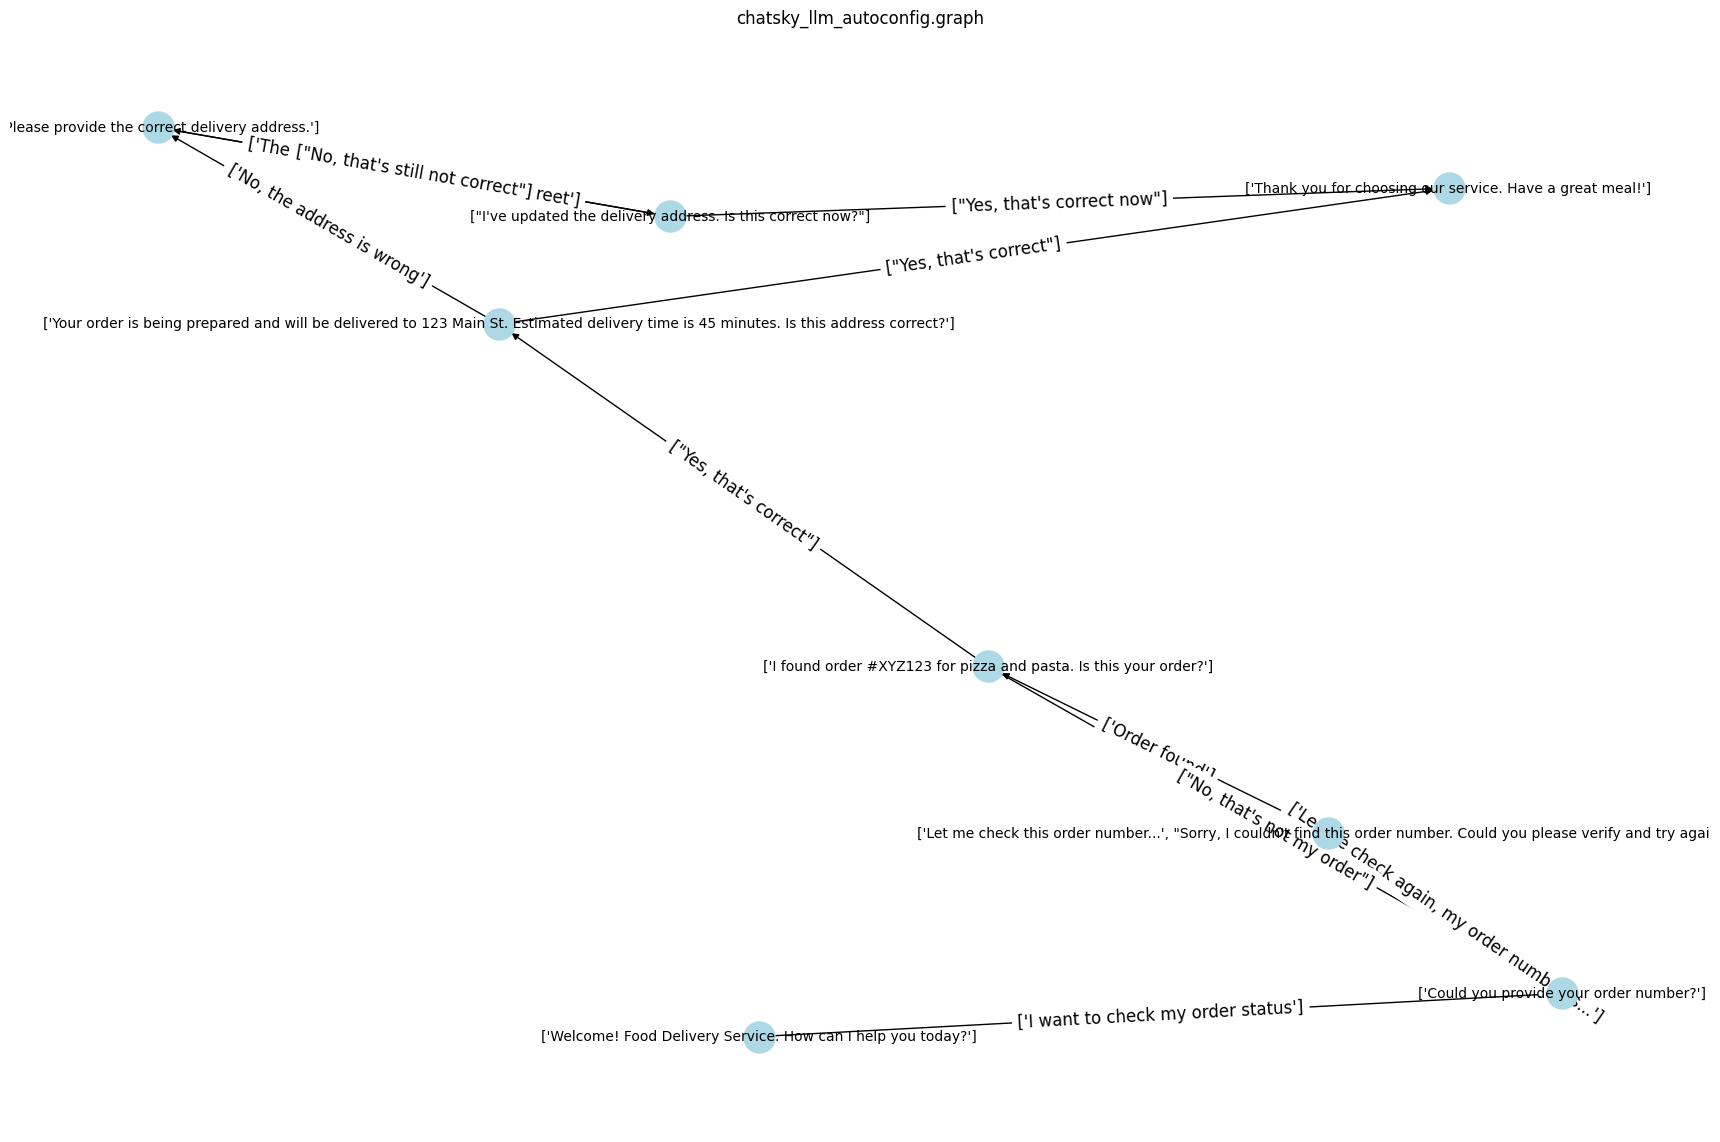

In [8]:
gr.visualise()

In [9]:
def list_in(a, b):
    return any(map(lambda x: b[x:x + len(a)] == a, range(len(b) - len(a) + 1)))

In [10]:
visitedList = [[]]

def all_paths(graph: Graph, start: int, visited: list):
    print("start: ", start, len(visitedList))
    if len(visited) < 2 or not list_in(visited[-2:]+[start],visited):
        visited.append(start)
        print("visited:", visited)
        for edge in graph.edge_by_source(start):

        # if [start,edge['target']] not in visited:           
            all_paths(graph, edge['target'], visited.copy())
    visitedList.append(visited)

In [11]:
all_paths(gr, starts[0]['id'], [])

print(visitedList)

start:  1 1
visited: [1]
start:  2 1
visited: [1, 2]
start:  3 1
visited: [1, 2, 3]
start:  2 1
visited: [1, 2, 3, 2]
start:  3 1
visited: [1, 2, 3, 2, 3]
start:  2 1
start:  4 2
visited: [1, 2, 3, 2, 3, 4]
start:  2 2
visited: [1, 2, 3, 2, 3, 4, 2]
start:  3 2
visited: [1, 2, 3, 2, 3, 4, 2, 3]
start:  2 2
start:  4 3
start:  5 6
visited: [1, 2, 3, 2, 3, 4, 5]
start:  6 6
visited: [1, 2, 3, 2, 3, 4, 5, 6]
start:  7 6
visited: [1, 2, 3, 2, 3, 4, 5, 6, 7]
start:  6 6
visited: [1, 2, 3, 2, 3, 4, 5, 6, 7, 6]
start:  7 6
visited: [1, 2, 3, 2, 3, 4, 5, 6, 7, 6, 7]
start:  6 6
start:  8 7
visited: [1, 2, 3, 2, 3, 4, 5, 6, 7, 6, 7, 8]
start:  8 10
visited: [1, 2, 3, 2, 3, 4, 5, 6, 7, 8]
start:  8 13
visited: [1, 2, 3, 2, 3, 4, 5, 8]
start:  4 18
visited: [1, 2, 3, 4]
start:  2 18
visited: [1, 2, 3, 4, 2]
start:  3 18
visited: [1, 2, 3, 4, 2, 3]
start:  2 18
visited: [1, 2, 3, 4, 2, 3, 2]
start:  3 18
visited: [1, 2, 3, 4, 2, 3, 2, 3]
start:  2 18
start:  4 19
start:  4 22
start:  5 25
visited:

In [12]:
import itertools
visitedList.sort()
final = list(k for k,_ in itertools.groupby(visitedList))[1:]

In [13]:
final

[[1],
 [1, 2],
 [1, 2, 3],
 [1, 2, 3, 2],
 [1, 2, 3, 2, 3],
 [1, 2, 3, 2, 3, 4],
 [1, 2, 3, 2, 3, 4, 2],
 [1, 2, 3, 2, 3, 4, 2, 3],
 [1, 2, 3, 2, 3, 4, 5],
 [1, 2, 3, 2, 3, 4, 5, 6],
 [1, 2, 3, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 2, 3, 4, 5, 6, 7, 6],
 [1, 2, 3, 2, 3, 4, 5, 6, 7, 6, 7],
 [1, 2, 3, 2, 3, 4, 5, 6, 7, 6, 7, 8],
 [1, 2, 3, 2, 3, 4, 5, 6, 7, 8],
 [1, 2, 3, 2, 3, 4, 5, 8],
 [1, 2, 3, 4],
 [1, 2, 3, 4, 2],
 [1, 2, 3, 4, 2, 3],
 [1, 2, 3, 4, 2, 3, 2],
 [1, 2, 3, 4, 2, 3, 2, 3],
 [1, 2, 3, 4, 5],
 [1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 6],
 [1, 2, 3, 4, 5, 6, 7, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 6, 7, 8],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [1, 2, 3, 4, 5, 8]]

In [14]:
print(Dialogue().from_nodes_ids(gr, final[-1]))

assistant: Welcome! Food Delivery Service. How can I help you today?
user: I want to check my order status
assistant: Could you provide your order number?
user: My order number is XYZ123
assistant: Let me check this order number...
user: Order found
assistant: I found order #XYZ123 for pizza and pasta. Is this your order?
user: Yes, that's correct
assistant: Your order is being prepared and will be delivered to 123 Main St. Estimated delivery time is 45 minutes. Is this address correct?
user: Yes, that's correct
assistant: Thank you for choosing our service. Have a great meal!


In [15]:
sources = list(set([g['source'] for g in graph_dict['edges']]))

In [16]:
ends = [g['id'] for g in graph_dict['nodes'] if g['id'] not in sources]
ends

[8]

In [17]:
node_paths = [f for f in final if f[-1] in ends]

In [18]:
node_paths

[[1, 2, 3, 2, 3, 4, 5, 6, 7, 6, 7, 8],
 [1, 2, 3, 2, 3, 4, 5, 6, 7, 8],
 [1, 2, 3, 2, 3, 4, 5, 8],
 [1, 2, 3, 4, 5, 6, 7, 6, 7, 8],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [1, 2, 3, 4, 5, 8]]

In [24]:
full_paths = []
for p in node_paths:
    print(p)
    path = []
    for idx,s in enumerate(p[:-1]):
        path.append({"participant": "assistant", "text": gr.node_by_id(s)['utterances'][0]})
        # path.append({"user": list(set(gr.edge_by_source(s)) & set(gr.edge_by_target(p[idx+1])))[0]['utterances']})
        sources = gr.edge_by_source(s)
        targets = gr.edge_by_target(p[idx+1])
        print("SOURCES: ", sources, s)
        print("TARGETS: ", targets, p[idx+1])
        # targets = set([(e['source'],e['target']) for e in gr.edge_by_target(p[idx+1])])
        edge = [e for e in sources if e in targets][0]
        path.append(({"participant": "user", "text": edge['utterances'][0]}))
    path.append({"participant": "assistant", "text": gr.node_by_id(p[-1])['utterances'][0]})
    full_paths.append(path)
full_paths

[1, 2, 3, 2, 3, 4, 5, 6, 7, 6, 7, 8]
SOURCES:  [{'source': 1, 'target': 2, 'utterances': ['I want to check my order status']}] 1
TARGETS:  [{'source': 1, 'target': 2, 'utterances': ['I want to check my order status']}, {'source': 3, 'target': 2, 'utterances': ['Let me check again, my order number is...']}, {'source': 4, 'target': 2, 'utterances': ["No, that's not my order"]}] 2
SOURCES:  [{'source': 2, 'target': 3, 'utterances': ['My order number is XYZ123']}] 2
TARGETS:  [{'source': 2, 'target': 3, 'utterances': ['My order number is XYZ123']}] 3
SOURCES:  [{'source': 3, 'target': 2, 'utterances': ['Let me check again, my order number is...']}, {'source': 3, 'target': 4, 'utterances': ['Order found']}] 3
TARGETS:  [{'source': 1, 'target': 2, 'utterances': ['I want to check my order status']}, {'source': 3, 'target': 2, 'utterances': ['Let me check again, my order number is...']}, {'source': 4, 'target': 2, 'utterances': ["No, that's not my order"]}] 2
SOURCES:  [{'source': 2, 'target':

[[{'participant': 'assistant',
   'text': 'Welcome! Food Delivery Service. How can I help you today?'},
  {'participant': 'user', 'text': 'I want to check my order status'},
  {'participant': 'assistant', 'text': 'Could you provide your order number?'},
  {'participant': 'user', 'text': 'My order number is XYZ123'},
  {'participant': 'assistant', 'text': 'Let me check this order number...'},
  {'participant': 'user', 'text': 'Let me check again, my order number is...'},
  {'participant': 'assistant', 'text': 'Could you provide your order number?'},
  {'participant': 'user', 'text': 'My order number is XYZ123'},
  {'participant': 'assistant', 'text': 'Let me check this order number...'},
  {'participant': 'user', 'text': 'Order found'},
  {'participant': 'assistant',
   'text': 'I found order #XYZ123 for pizza and pasta. Is this your order?'},
  {'participant': 'user', 'text': "Yes, that's correct"},
  {'participant': 'assistant',
   'text': 'Your order is being prepared and will be del

In [25]:
full_paths[0]

[{'participant': 'assistant',
  'text': 'Welcome! Food Delivery Service. How can I help you today?'},
 {'participant': 'user', 'text': 'I want to check my order status'},
 {'participant': 'assistant', 'text': 'Could you provide your order number?'},
 {'participant': 'user', 'text': 'My order number is XYZ123'},
 {'participant': 'assistant', 'text': 'Let me check this order number...'},
 {'participant': 'user', 'text': 'Let me check again, my order number is...'},
 {'participant': 'assistant', 'text': 'Could you provide your order number?'},
 {'participant': 'user', 'text': 'My order number is XYZ123'},
 {'participant': 'assistant', 'text': 'Let me check this order number...'},
 {'participant': 'user', 'text': 'Order found'},
 {'participant': 'assistant',
  'text': 'I found order #XYZ123 for pizza and pasta. Is this your order?'},
 {'participant': 'user', 'text': "Yes, that's correct"},
 {'participant': 'assistant',
  'text': 'Your order is being prepared and will be delivered to 123 Ma

In [27]:
dialogues = [Dialogue().from_list(i) for i in full_paths]
print(auto_metrics.all_utterances_present(gr, dialogues))

{"No, that's not my order", "Sorry, I couldn't find this order number. Could you please verify and try again?"}
